In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

import graphviz #나무 구조 시각화
from sklearn.tree import export_graphviz

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

import statistics
import scipy.stats as stats
import ast

In [4]:
matplotlib.rc("font", family = "NanumGothic")

### 데이터 불러오기

In [2]:
wine_area = pd.read_csv('wine_area_province.csv',encoding = 'cp949')
wine_dictionary = pd.read_csv('wine_data_dictionary.csv',encoding = 'cp949')
wine_sales = pd.read_csv('wine_data_sales.csv',encoding = 'cp949')
wine_frequency = pd.read_csv('wine_frequency.csv',encoding = 'cp949')
wine_preference = pd.read_csv('wine_preference.csv',encoding = 'cp949')
wine_quality_red = pd.read_csv('wine_quality_red.csv',encoding = 'cp949')
wine_quality_white = pd.read_csv('wine_quality_white.csv',encoding = 'cp949')
wine_side = pd.read_csv('wine_side.csv',encoding = 'cp949')
order_train = pd.read_csv('eShopping_order_products__train.csv',encoding = 'cp949')
orders = pd.read_csv('eShopping_orders.csv',encoding = 'cp949')
wine_area_grade = pd.read_csv('wine_area_grade.csv',encoding = 'cp949')
wine_data_group = pd.read_csv('wine_raw_data_group.csv',encoding = 'cp949')

### 미상과 unknown의 경우 추측이 불가능 하므로 데이터를 삭제

In [3]:
wine_sales=wine_sales[wine_sales['age']!='미상']
wine_sales=wine_sales[wine_sales['gender']!='UNKNOW']
wine_sales=wine_sales[wine_sales['marital']!='UNKNOWN']
wine_sales=wine_sales[wine_sales['job']!='미상']

In [5]:
wine_sales = wine_sales.drop("Unnamed: 0", axis=1)

In [6]:
wine_sales = wine_sales.reset_index(drop=True)

In [8]:
wine_area_grade['Cities'] = wine_area_grade['Cities'].apply(ast.literal_eval)

### 각 도시에 따른 급지를 column으로  추가

In [102]:
wine_area_grade

,Unnamed: 0,Cities
0,1급지,"[강남구, 양천구, 기장군, 해운대구, 청주시]"
1,2급지,"[포천시, 화성시, 포항시 남구, 강동구, 사하구]"
2,3급지,"[강북구, 평택시, 가평군, 안양시, 포항시 북구]"
3,4급지,"[광양시, 해남군, 연제구, 천안시, 마포구]"
4,5급지,"[하동군, 함안군, 거제시, 진구, 홍성군]"
5,6급지,"[충주시, 익산시, 구례군, 곡성군, 진천군]"


In [9]:
result = []
for i in range(138919):
    if wine_sales['city'][i] in wine_area_grade['Cities'][0]:
        result.append('1급지')
    elif wine_sales['city'][i] in wine_area_grade['Cities'][1]:
        result.append('2급지')
    elif wine_sales['city'][i] in wine_area_grade['Cities'][2]:
        result.append('3급지')
    elif wine_sales['city'][i] in wine_area_grade['Cities'][3]:
        result.append('4급지')
    else:
        result.append('5급지')

wine_sales['area_grade'] = result

### purchase정보를 one hot encoding

In [12]:
wine_sales['purchase'] = wine_sales['purchase'].apply(ast.literal_eval)
columns_list = [i for i in wine_sales['purchase']]
columns_list2 = [y for x in columns_list for y in x]
final_columns = set(columns_list2)
for j in final_columns:
    wine_sales[j] = [i.count(j) for i in columns_list]

In [13]:
wine_sales

,date,gender,age,job,marital,province,city,purchase,amount,area_grade,F,D,C,H,G,E,A,B
0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"[D, F, D, G]",100,1급지,1,2,0,0,1,0,0,0
1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"[C, G, E]",60,1급지,0,0,1,0,1,1,0,0
2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"[B, F]",30,4급지,1,0,0,0,0,0,0,1
3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,[C],15,1급지,0,0,1,0,0,0,0,0
4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"[G, A, B]",75,5급지,0,0,0,0,1,0,1,1
5,2016-05-01,FEMALE,20대,자영업,MARREID,서울시,양천구,"[G, D]",55,1급지,0,1,0,0,1,0,0,0
6,2016-05-01,MALE,20대,벤처직원,MARREID,전라도,광양시,"[G, F, E]",65,4급지,1,0,0,0,1,1,0,0
7,2016-05-01,MALE,40대,의사,MARREID,경상도,함안군,"[F, G]",50,5급지,1,0,0,0,1,0,0,0
8,2016-05-01,MALE,30대,기자,SINGLE,서울시,강남구,"[C, F, G, H]",75,1급지,1,0,1,1,1,0,0,0
9,2016-05-01,MALE,20대,학생,MARREID,경기도,가평군,"[G, E, H]",55,3급지,0,0,0,1,1,1,0,0


### number : purchase의 종류에 상관없이 개수를 모두 합한 값

In [18]:

number = []
for i in range(len(wine_sales)):
    number.append(len(wine_sales['purchase'].values[i]))

wine_sales['number'] = number

In [19]:
wine_sales.head()

,date,gender,age,job,marital,province,city,purchase,amount,area_grade,F,D,C,H,G,E,A,B,number
0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"[D, F, D, G]",100,1급지,1,2,0,0,1,0,0,0,4
1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"[C, G, E]",60,1급지,0,0,1,0,1,1,0,0,3
2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"[B, F]",30,4급지,1,0,0,0,0,0,0,1,2
3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,[C],15,1급지,0,0,1,0,0,0,0,0,1
4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"[G, A, B]",75,5급지,0,0,0,0,1,0,1,1,3


### 성별, 결혼 유무, 나이별로 묶음

In [12]:
grouped = wine_sales['amount'].groupby([wine_sales['gender'],wine_sales['marital'],wine_sales['age']]).agg(sum)

### 여자의 경우 결혼 유무, 나이별 와인 구매율

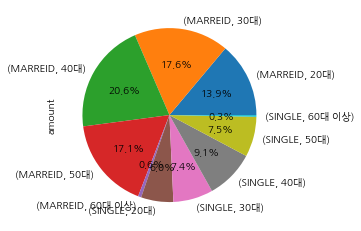

In [19]:
grouped['FEMALE'].plot.pie(autopct='%.1f%%')

### 남자의 경우 결혼 유무, 나이별 와인 구매율

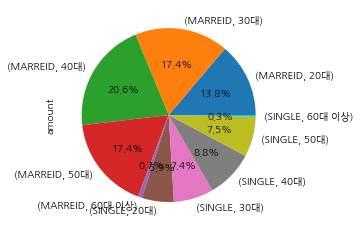

In [18]:
grouped['MALE'].plot.pie(autopct='%.1f%%')

In [15]:
grouped

gender  marital  age   
FEMALE  MARREID  20대       263220
                 30대       333355
                 40대       390355
                 50대       323145
                 60대 이상     11160
        SINGLE   20대       113620
                 30대       140355
                 40대       172080
                 50대       141445
                 60대 이상      5965
MALE    MARREID  20대       614125
                 30대       774955
                 40대       918555
                 50대       775770
                 60대 이상     32565
        SINGLE   20대       264330
                 30대       329855
                 40대       393775
                 50대       332580
                 60대 이상     13365
Name: amount, dtype: int64

### 성별, 결혼 유무, 나이별로 와인 구매량을 그래프로 시각화

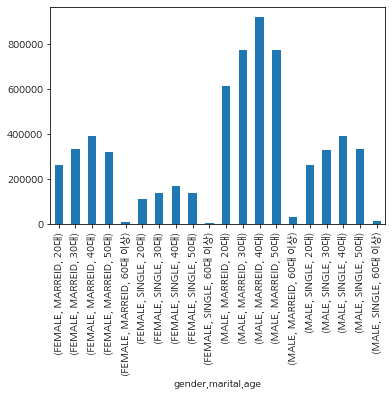

In [93]:
grouped.plot.bar()

#### 위의 그래프를 통한 해석
1. 성별
 - 여자에 비해 남자의 와인 구매량이 상대적으로 많은 것을 볼 수 있다.
2. 결혼 유무
 - 결혼 했을 경우 비혼에 비해 와인 구매량이 상대적으로 많은 것을 볼 수 있다.
3. 연령별
 - 60대 이상 < 20대 < 30대 = 50대 < 40대 순으로 와인 구매량의 차이를 볼 수 있다.

In [64]:
practice = wine_sales

### 성별, 결혼 유무, 직업별 와인 구매량 비교

In [67]:
grouped1 = practice['amount'].groupby([practice['gender'],practice['marital'],practice['job']]).agg(sum)

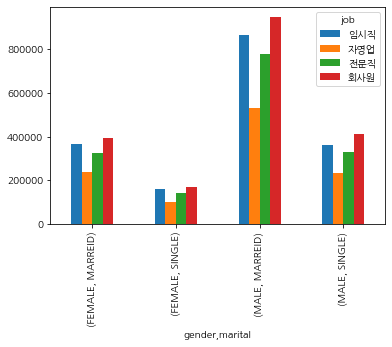

In [68]:
grouped1.unstack().plot.bar()

#### 나이에 상관없이 기혼 남성이 가장 소비를 많이 한 것을 볼 수 있다. 이 집단이 어떤 와인을 선호하는지를 알아보고 그거에 따른 마케팅전략을 세울수 있다.

In [96]:
grouped2 = wine_sales['amount'].groupby([wine_sales['marital'],wine_sales['age'],wine_sales['gender']]).agg(sum)

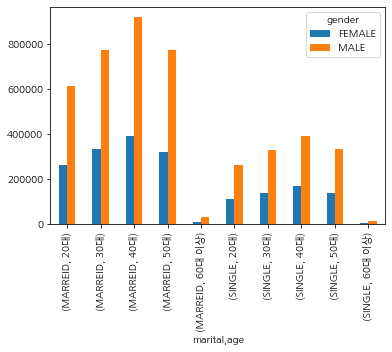

In [97]:
grouped2.unstack().plot.bar()

#### 결혼 유무, 나이별로 살펴 보았을 때 모든 그룹들에서 여자 보다 남자의 와인 구매량이 더 많은 것을 볼 수 있다. 안정적인 마케팅을 위해서는 남자가 선호하는 와인을 조사해 보는 것이 좋다.

In [98]:
grouped3 = wine_sales['amount'].groupby([wine_sales['gender'],wine_sales['age'],wine_sales['marital']]).agg(sum)

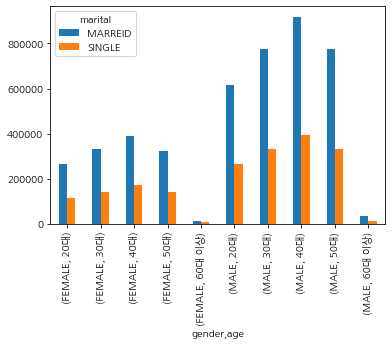

In [99]:
grouped3.unstack().plot.bar()

#### 성별, 나이별에 상관없이 결혼한 사람이 비혼에 비해 와인 구매량이 많은 것을 알 수 있다.

In [149]:
wine_preference = pd.read_csv('wine_preference.csv',encoding = 'cp949')
wine_side = pd.read_csv('wine_side.csv',encoding = 'cp949')
wine_frequency = pd.read_csv('wine_frequency.csv',encoding = 'cp949')
wine_area_grade = pd.read_csv('wine_area_grade.csv',encoding = 'cp949')

In [150]:
wine_preference['seq'] = [i for i in range(1,10001)]

test = pd.merge(wine_side,wine_preference,on = 'seq')
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
test = test[['seq', 'gender', 'age', 'job', 'marital', 'province',
       'city', 'side', 'choice', 'choice1']]
wine_preference = pd.merge(test,wine_frequency,on = 'seq')
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']

cities = ['청주시', '화성시', '사하구', '양천구', '강남구', '광양시', '강북구', '포천시', '안양시',
       '마포구', '함안군', '해운대구', '구례군', '기장군', '포항시 북구', '천안시', '강동구',
       '포항시 남구']
provinces = ['충청도','경기도','부산시','서울시','서울시','전라도','서울시','경기도','경기도','서울시','경상도','부산시','전라도','부산시','경상도','충청도','서울시','경상도']

for i in range(18):
    wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])] = wine_preference[(wine_preference['province'].isnull()) & (wine_preference['city']==cities[i])].fillna(provinces[i])


wine_preference['gender'] = wine_preference['gender'].replace('UNKNOW','UNKNOWN')
wine_preference['gender'] = wine_preference['gender'].fillna('UNKNOWN')
wine_preference['marital'] = wine_preference['marital'].fillna('UNKNOWN')

choices = ['E', 'C', 'D', 'B', 'H', 'A', 'G', 'F']
sides = ['Ricotta','Gorgonzola','Roquefort','Brie','Annon','Camenbert','Valencay','Cheddar']

for i in range(len(choices)):
    wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])] = wine_preference[(wine_preference['side'].isnull())&(wine_preference['choice']==choices[i])].fillna(sides[i])
    
wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']    

# import ast

# wine_area_grade['Cities'] = wine_area_grade['Cities'].apply(ast.literal_eval)

result = []
for i in range(10000):
    if wine_preference['city'][i] in wine_area_grade['Cities'][0]:
        result.append('1급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][1]:
        result.append('2급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][2]:
        result.append('3급지')
    elif wine_preference['city'][i] in wine_area_grade['Cities'][3]:
        result.append('4급지')
    else:
        result.append('5급지')

wine_preference['area_grade'] = result

for i in range(len(wine_preference)):
    if wine_preference['rate'][i] > 1:
        tmp = wine_preference['frequency'][i]
        wine_preference['frequency'][i] = wine_preference['wineFrequency'][i]
        wine_preference['wineFrequency'][i] = tmp

wine_preference['rate'] = wine_preference['wineFrequency']/wine_preference['frequency']
wine_preference['rate'] = wine_preference['rate'].fillna(0)

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


#### 전처리 방식
1. nan값처리
 - province와 city는 서로 연관성을 가지고 있음 -> city를 통해 province를 알 수 있음
 - ex) city가 기장군일 경우 province는 부산시로 추측할 수 있음
 - gender와 age의 경우 다른 feature을 이용하여 빈값을 채울 수 없으므로 unknown으로 대체
 - choice와 side는 1대1로 대응됨
2. feature columns 생성
 - frequency : 일주일동안 술을 먹는 횟수, wineFrequency : 일주일동안 와인을 먹는 횟수
 - wineFrequency/frequency를 통하여 술을 먹는 사람중 일주일 동안 와인을 먹는 빈도를 나타냄(rate) 

In [151]:
wine_preference.head()

,seq,gender,age,job,marital,province,city,side,choice,choice1,prefer,frequency,wineFrequency,rate,area_grade
0,1,MALE,40대,자영업,MARREID,부산시,기장군,Ricotta,E,E,견고함,2,1,0.500000,1급지
1,2,FEMALE,20대,자영업,SINGLE,충청도,천안시,Ricotta,E,E,깊이감,3,1,0.333333,4급지
2,3,MALE,40대,임시직,MARREID,서울시,강남구,Camenbert,C,B,깊이감,3,2,0.666667,1급지
3,4,FEMALE,50대,벤처직원,MARREID,경상도,거제시,Roquefort,D,D,깊이감,2,1,0.500000,5급지
4,5,MALE,30대,교수,MARREID,경기도,포천시,Cheddar,E,E,깊이감,3,2,0.666667,2급지


In [152]:
wine_sales.head()

,date,gender,age,job,marital,province,city,purchase,amount,area_grade,C,A,E,H,D,G,F,B
0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"[D, F, D, G]",100,1급지,0,0,0,0,2,1,1,0
1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"[C, G, E]",60,1급지,1,0,1,0,0,1,0,0
2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"[B, F]",30,4급지,0,0,0,0,0,0,1,1
3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,[C],15,1급지,1,0,0,0,0,0,0,0
4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"[G, A, B]",75,5급지,0,1,0,0,0,1,0,1


### 40대 남자의 와인 구매율이 가장 높았으므로 해당 target의 와인별 구매량 확인

In [153]:
alpha = ['A','B','C','D','E','F','G','H']
print('40대 기혼 남자의 와인별 구매 갯수')
for i in alpha:
    print(i,':',sum(wine_sales[(wine_sales['marital']=='MARREID')&(wine_sales['age']=='40대')&(wine_sales['gender']=='MALE')][i]))


40대 기혼 남자의 와인별 구매 갯수
A : 5646
B : 5918
C : 3888
D : 6034
E : 6561
F : 4857
G : 6679
H : 5667


#### 분석결과 G 와인을 가장 많이 구매하는 것을 볼 수 있음

In [154]:
wine_data_group

,그룹,당도,알콜 농도,과일향,오크향,깊이,견고함
0,A,M,H,M,H,H,H
1,B,H,L,H,M,L,M
2,C,H,L,H,M,M,M
3,D,H,H,H,M,L,L
4,E,H,H,M,M,M,L
5,F,M,H,M,M,M,H
6,G,L,H,H,H,M,M
7,H,M,H,M,M,H,H


In [155]:
wine_preference.head()

,seq,gender,age,job,marital,province,city,side,choice,choice1,prefer,frequency,wineFrequency,rate,area_grade
0,1,MALE,40대,자영업,MARREID,부산시,기장군,Ricotta,E,E,견고함,2,1,0.500000,1급지
1,2,FEMALE,20대,자영업,SINGLE,충청도,천안시,Ricotta,E,E,깊이감,3,1,0.333333,4급지
2,3,MALE,40대,임시직,MARREID,서울시,강남구,Camenbert,C,B,깊이감,3,2,0.666667,1급지
3,4,FEMALE,50대,벤처직원,MARREID,경상도,거제시,Roquefort,D,D,깊이감,2,1,0.500000,5급지
4,5,MALE,30대,교수,MARREID,경기도,포천시,Cheddar,E,E,깊이감,3,2,0.666667,2급지


In [156]:
alpha = ['A','B','C','D','E','F','G','H']
print('40대 기혼 남자의 와인별 선호도')
for i in alpha:
    print(i,':',len(wine_preference[(wine_preference['marital']=='MARREID')&(wine_preference['age']=='40대')&(wine_preference['gender']=='MALE')&(wine_preference['choice']==i)]))


40대 기혼 남자의 와인별 선호도
A : 226
B : 37
C : 39
D : 49
E : 73
F : 31
G : 139
H : 196


### 각 직업을 크게 4개로 나눔
 - 전문직 : 변호사, 의사, 기자, 연구원, 교수
 - 회사원 : 회사직원, 중소기업직원, 벤처직원
 - 임시직 : 임시직, 학생, 미상, 공무원
 - 자영업

In [159]:
sp = ['변호사','의사','기자','연구원','교수']
bs = ['회사직원','중소기업직원','벤처직원']
etc = ['임시직','학생','미상','공무원']

for i in range(len(wine_preference)):
    if wine_preference['job'][i] in sp:
        wine_preference['job'] = wine_preference['job'].replace(wine_preference['job'][i],'전문직')
    
    elif wine_preference['job'][i] in bs:
        wine_preference['job'] = wine_preference['job'].replace(wine_preference['job'][i],'회사원')
    
    elif wine_preference['job'][i] in etc:
        wine_preference['job'] = wine_preference['job'].replace(wine_preference['job'][i],'임시직')

In [160]:
wine_preference['job'].unique()

array(['자영업', '임시직', '회사원', '전문직'], dtype=object)

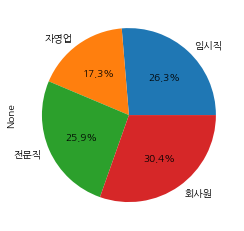

In [161]:
# JOB
df=wine_preference.groupby(['job']).size()
df.plot.pie(autopct='%.1f%%')

In [ ]:
alpha = ['A','B','C','D','E','F','G','H']
print('40대 기혼 남자의 와인별 구매 갯수')
for i in alpha:
    print(i,':',sum(wine_preference[(wine_preference['marital']=='MARREID')&(wine_preference['age']=='40대')&(wine_sales['gender']=='MALE')][i]))


In [35]:
grouped = wine_sales['amount'].groupby([wine_sales['gender'],wine_sales['marital'],wine_sales['age']]).agg(sum)
grouped

gender  marital  age   
FEMALE  MARREID  20대       263220
                 30대       333355
                 40대       390355
                 50대       323145
                 60대 이상     11160
        SINGLE   20대       113620
                 30대       140355
                 40대       172080
                 50대       141445
                 60대 이상      5965
MALE    MARREID  20대       614125
                 30대       774955
                 40대       918555
                 50대       775770
                 60대 이상     32565
        SINGLE   20대       264330
                 30대       329855
                 40대       393775
                 50대       332580
                 60대 이상     13365
Name: amount, dtype: int64

In [43]:
wine_sales[wine_sales['gender']=='MALE']['amount'].groupby([wine_sales['marital'],wine_sales['A']]).agg(sum)

marital  A
MARREID  0    1930945
         1     994025
         2     173350
         3      17195
         4        455
SINGLE   0     824335
         1     422275
         2      79660
         3       7025
         4        610
Name: amount, dtype: int64

In [47]:
wine_sales[(wine_sales['gender']=='MALE')&(wine_sales['marital']=='MARREID')]

,date,gender,age,job,marital,province,city,purchase,amount,area_grade,C,F,B,H,A,E,D,G
6,2016-05-01,MALE,20대,벤처직원,MARREID,전라도,광양시,"[G, F, E]",65,4급지,0,1,0,0,0,1,0,1
7,2016-05-01,MALE,40대,의사,MARREID,경상도,함안군,"[F, G]",50,5급지,0,1,0,0,0,0,0,1
9,2016-05-01,MALE,20대,학생,MARREID,경기도,가평군,"[G, E, H]",55,3급지,0,0,0,1,0,1,0,1
24,2016-05-01,MALE,60대 이상,벤처직원,MARREID,서울시,강남구,[A],35,1급지,0,0,0,0,1,0,0,0
29,2016-05-01,MALE,30대,변호사,MARREID,부산시,해운대구,[F],20,1급지,0,1,0,0,0,0,0,0
30,2016-05-01,MALE,50대,기자,MARREID,전라도,광양시,"[D, E]",40,4급지,0,0,0,0,0,1,1,0
31,2016-05-01,MALE,30대,회사직원,MARREID,경상도,포항시 남구,"[H, F, G]",60,2급지,0,1,0,1,0,0,0,1
32,2016-05-01,MALE,40대,연구원,MARREID,전라도,곡성군,"[H, H]",20,5급지,0,0,0,2,0,0,0,0
34,2016-05-01,MALE,40대,자영업,MARREID,서울시,강남구,"[B, F]",30,1급지,0,1,1,0,0,0,0,0
35,2016-05-01,MALE,50대,벤처직원,MARREID,서울시,양천구,"[D, D, H, E]",75,1급지,0,0,0,1,0,1,2,0


In [50]:
sum(wine_sales[(wine_sales['gender']=='MALE')&(wine_sales['marital']=='MARREID')]['A'])

19287

In [60]:
wine_type = ['A','B','C','D','E','F','G','H']
price = [35,10,15,25,15,20,30,10]
total = 0

for i in range(len(wine_type)):
    print(wine_type[i],sum(wine_sales[(wine_sales['gender']=='MALE')&(wine_sales['marital']=='MARREID')][wine_type[i]])*price[i]*1000)
    print(sum(wine_sales[(wine_sales['gender']=='MALE')&(wine_sales['marital']=='MARREID')][wine_type[i]]))

A 675045000
19287
B 201430000
20143
C 196470000
13098
D 500475000
20019
E 336360000
22424
F 330780000
16539
G 681660000
22722
H 193750000
19375


### 성별, 결혼 유무, 직업별 와인의 구매량

In [72]:
grouped1

gender  marital  job
FEMALE  MARREID  임시직    365995
                 자영업    235825
                 전문직    326635
                 회사원    392780
        SINGLE   임시직    161895
                 자영업     98505
                 전문직    143745
                 회사원    169320
MALE    MARREID  임시직    861905
                 자영업    528395
                 전문직    779265
                 회사원    946405
        SINGLE   임시직    360610
                 자영업    232280
                 전문직    330970
                 회사원    410045
Name: amount, dtype: int64

In [70]:
grouped1 = practice['amount'].groupby([practice['gender'],practice['marital'],practice['job']]).agg(sum)

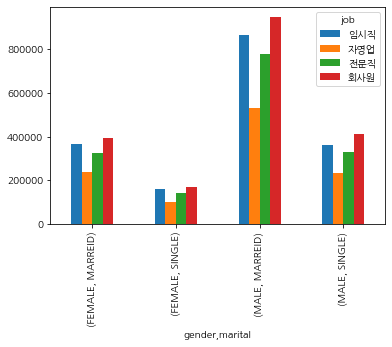

In [71]:
grouped1.unstack().plot.bar()

In [73]:
grouped2 = practice['amount'].groupby([practice['gender'],practice['marital'],practice['age']]).agg(sum)

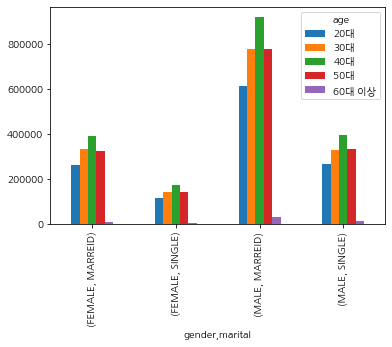

In [74]:
grouped2.unstack().plot.bar()

In [77]:
grouped3 = practice['amount'].groupby([practice['gender'],practice['age'],practice['marital']]).agg(sum)

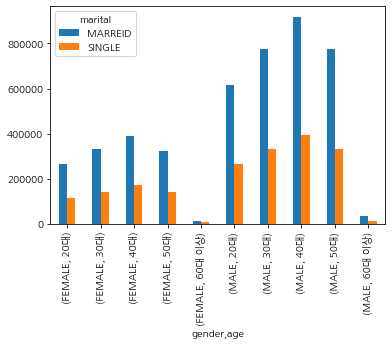

In [78]:
grouped3.unstack().plot.bar()

In [54]:
len(wine_sales[wine_sales['date']=='2016-05-01'])

726

In [56]:
alpha = ['A','B','C','D','E','F','G','H']

for i in alpha:
    test = wine_sales.groupby(wine_sales['date'])[i].sum()
    print(i,test['2016-10-01':'2016-10-31'].sum())


A 6899
B 8253
C 4782
D 6927
E 7941
F 5907
G 8387
H 7131


In [58]:
wine_sales

,date,gender,age,job,marital,province,city,purchase,amount,area_grade,F,D,C,H,G,E,A,B,number
0,2016-05-01,FEMALE,30대,임시직,SINGLE,충청도,청주시,"[D, F, D, G]",100,1급지,1,2,0,0,1,0,0,0,4
1,2016-05-01,FEMALE,30대,변호사,MARREID,서울시,양천구,"[C, G, E]",60,1급지,0,0,1,0,1,1,0,0,3
2,2016-05-01,MALE,60대 이상,회사직원,SINGLE,부산시,연제구,"[B, F]",30,4급지,1,0,0,0,0,0,0,1,2
3,2016-05-01,FEMALE,40대,중소기업직원,MARREID,서울시,양천구,[C],15,1급지,0,0,1,0,0,0,0,0,1
4,2016-05-01,FEMALE,50대,의사,MARREID,경상도,거제시,"[G, A, B]",75,5급지,0,0,0,0,1,0,1,1,3
5,2016-05-01,FEMALE,20대,자영업,MARREID,서울시,양천구,"[G, D]",55,1급지,0,1,0,0,1,0,0,0,2
6,2016-05-01,MALE,20대,벤처직원,MARREID,전라도,광양시,"[G, F, E]",65,4급지,1,0,0,0,1,1,0,0,3
7,2016-05-01,MALE,40대,의사,MARREID,경상도,함안군,"[F, G]",50,5급지,1,0,0,0,1,0,0,0,2
8,2016-05-01,MALE,30대,기자,SINGLE,서울시,강남구,"[C, F, G, H]",75,1급지,1,0,1,1,1,0,0,0,4
9,2016-05-01,MALE,20대,학생,MARREID,경기도,가평군,"[G, E, H]",55,3급지,0,0,0,1,1,1,0,0,3


### 분석결과
 - 성별, 나이별, 결혼유무 분석해본 결과 기혼 40대 남성의 와인 구매량이 가장 많은 것을 확인 => 안정적인 수익향상을 위해서 해당 target을 기준으로 마케팅전략을 세우는 것도 나쁘지 않음
 - 직업별로 분석해본 결과 회사원의 비율이 가장 크게 나타났지만 임시로 그룹지은 것이기 때문에 참고만 할 것
